[Inhaltsverzeichnis](../AP4.ipynb) | [ < zurück ](wohin?)|  [ > next](wohin?)

## 4.3.  Zeitreihen-Transformation




FLUCCOplus

In [5]:
# OPTIONAL: Load the "autoreload" extension so that code can change
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
%matplotlib inline
from FLUCCOplus.notebooks import *
import FLUCCOplus.transform as traffo
import FLUCCOplus.scenarios as scens
import FLUCCOplus.electricitymap as elmap
import FLUCCOplus.plots as fpp

## Annual Scenario Selection

In [7]:
#select  Electricity Map Base Year
em_year = 2018 # 2015, 2016, 2017, 2018 #not 2019, cause?

# select Scenario Name
#name = "EM2018"
#name = "EM2019"
#name = "E-Control 2019"
#name = "Energie und Klimazukunft 2030 (Veigl17)"
#name = "Erneuerbare Energie 2030 (UBA16)"
#name = "WEM 2030 (UBA17)"
#name = "Transition 2030 (UBA17)"
#name = "Energie und Klimazukunft 2050 (Veigl17)"
#name = "Erneuerbare Energie 2050 (UBA16)"
#name = "WEM 2050 (UBA17)"
name = "Transition 2050 (UBA17)"
#name = "100% Erneuerbare Deckung 2050 (FLUCCO+)"
#name = "100% Erneuerbare Deckung 2050 inkl Methan (FLUCCO+)"

scaled_scenario = scens.Scenario(
    name = name, # can be anything
    scenario = name, # must be a scenario name
    em_base = {"year": em_year,
               "df": elmap.fetch(year=em_year)})

df = scaled_scenario.TSD

C:\Users\Edith Parada\PycharmProjects\FLUCCOplus\venv\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
C:\Users\Edith Parada\PycharmProjects\FLUCCOplus\venv\lib\site-packages\openpyxl\worksheet\_reader.py:308: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


## Transformations


In [39]:

# vordefinierte transformationen, die dann auch im bericht beschrieben sind und inhaltlich motiviert

PV_SUED = {
    "kind": "Photovoltaik",
    "weights": [1,1,1,1,1,1,1,1],
    "timeframe": 24
}

PV_OST_WEST = {
    "kind": "Photovoltaik",
    "weights": [1.1,1,0.9,0.6,0.6,0.9,1,1.1],
    "timeframe": 24
}

BATTERIESPEICHER = {
    "kind": "Photovoltaik",
    "weights": [0.85, 0.85, 0.85, 0.6, 0.7, 0.8, 1.05, 1.3],
    "timeframe": 24
}

VERBRAUCH_DSM = {
    "kind": "Strombedarf",
    "weights": [1.1, 1.1, 2, 2, 1.1, 1.1],
    "timeframe": 24
}

VERBRAUCH_SAISONAL = {
    "kind": "Strombedarf", #?? name
    "weights": [1.1, 1.2, 1.5, 1.5, 1.2, 1.1],
    "timeframe": 8760
}

# transformation scen arios 0 are contaioners for a number of predefined transformations that should be applied
grundscenario = []
scenario1 = [
    PV_OST_WEST
]

scenario2 = [
    PV_OST_WEST,
    VERBRAUCH_SAISONAL
]

scenario3 = [
    BATTERIESPEICHER,
    VERBRAUCH_SAISONAL
]

scenario4 = [
    PV_OST_WEST,
    VERBRAUCH_DSM
]


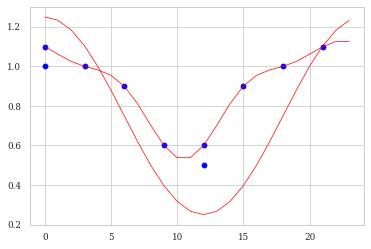

In [46]:
import FLUCCOplus.plots as fps
test = traffo.Transformation(weights=[1,0.5], timeframe=24)
test2 = traffo.Transformation(**PV_OST_WEST)
test3 = traffo.Transformation()
fig, ax = plt.subplots(1,1)
test.plot(ax)
test2.plot(ax)


In [ ]:

pv = scaled_scenario.TSD.Photovoltaik
tsd = test.apply(pv)

In [ ]:

scaled_scenario.reset()
#scaled.apply(scenario1)
scaled_scenario.apply(scenario2)
#scaled.apply(scenario3)